In [32]:
import PIL.Image as pilimg # for reading image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

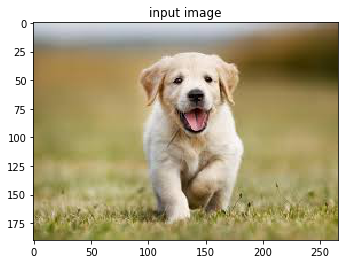

In [33]:
im = pilimg.open("dog.jpg")
pix = np.array(im)
plt.title('input image')
plt.imshow(pix)

In [34]:
size_row = len(pix)
size_col = len(pix[0])

x = np.zeros((size_row,size_col))
y = np.zeros((size_row,size_col))
i = 0
while(i < size_row):
    x[i,:] = i
    i = i+1
i = 0
while(i < size_col):
    y[:,i] = i
    i = i+1

rgb = pix.reshape(-1,3)
rgb = rgb.transpose()
xy = np.array((y,x))
xy = xy.transpose()
xy = xy.reshape(-1,2)
xy = xy.transpose()

data = np.vstack([xy,rgb])
count = data.shape[1]

In [35]:
print(count)
print(rgb.shape)
print(xy.shape)
print(data.shape)
print(len(data))

50540
(3, 50540)
(2, 50540)
(5, 50540)
5


In [36]:
def Distance(x, y):

    d = (x - y) ** 2   
    s = np.sum(d)

    return(s)

In [37]:
def generateCluster(cluster_num, image_num):# K-means알고리즘을 시작하기 위한 함수
    
    # 클러스터의 개수
    k = cluster_num
    # 각 픽셀에 대해 소속 클러스터를 표시하기 위한 라벨
    cluster_label = np.zeros(image_num)                   
    # 클러스터 마다의 centroid
    average_image = np.zeros((len(data), cluster_num), dtype=int) 
    # centroid와 각 pixel간의 distance를 담은 배열   
    distance_intensity = np.zeros((cluster_num, image_num), dtype=float)
    distance_spatial = np.zeros((cluster_num, image_num), dtype=float)
    
    return k, cluster_label, average_image, distance_intensity, distance_spatial

In [38]:
def initializeLabel(cluster_num, cluster_label): # 클러스터링 라벨 초기화
    random_seed=np.random.rand(len(cluster_label))*100 
    #variable that will be substituted to the label
    
    for i in range(len(cluster_label)):                   
        random_seed[i] = int(random_seed[i])
        random_seed[i] = random_seed[i] % cluster_num # 랜덤하게 초기화
    for i in range(len(cluster_label)):                       
        cluster_label[i] = random_seed[i]
    return

def computeCentroid(cluster_num, list_image,cluster_label):  #compute the average(center) of 
                                                #listimage sharing  same label
    sum = np.zeros((len(data) ,cluster_num))      # 각 클러스터의 픽셀 값의 합
    num = np.zeros(cluster_num)           # 각 클러스터의 픽셀 개수(dividance)
    
    for i in range(list_image.shape[1]): # 전체 픽셀 개수만큼 진행       
        sum[:,int(cluster_label[i])] = sum[:,int(cluster_label[i])] + list_image[:,i]
        # must change the type of label[i] to type(int)
        num[int(cluster_label[i])] = num[int(cluster_label[i])]+1
        # count the number
    for i in range(cluster_num):
        sum[:,i] /= num[i]                         # sum goes to be a mean value
    return sum

In [39]:
def assignLabel(list_image,average_image,label,distance_intensity, distance_spatial): #compute the distance 
                                                #average images and images. 
                                                #And update the label of points
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):
            distance_intensity[j,i]=Distance(average_image[2:5,j],list_image[2:5,i])
            distance_spatial[j,i]=Distance(average_image[0:2,j],list_image[0:2,i])
    distance = distance_intensity + distance_spatial
    for i in range(list_image.shape[1]):
        for j in range(average_image.shape[1]):               
            if distance[j,i]==distance[:,i].min():  #when thd distance is minimum
                label[i]=j                          #update label
    return

def represent(label,list_label,num):#num : 0 ~ k-1. we don't know what the most number 
                                    #in the cluster(num)'s is. this funstion 
                                    #will return the most number of certain cluster.
    num_arr=np.zeros(10)
    num_rep=-1
    for i in range(len(label)):
        if(label[i]==num):
            num_arr[list_label[i]]+=1
    for i in range(10):
        if(num_arr.max()==num_arr[i]):
            num_rep=i
    return num_rep                  #return the number that appeared the most

# def computeAccuracy(label,list_label,cluster_num): #compute the accuracy
#     sum=0
#     num_arr=np.zeros(10)
#     for j in range(cluster_num):
#         num=0
#         for ii in range(10):
#             num_arr[ii]=0
#         for i in range(len(label)):
#             if(label[i]==j):
#                 num_arr[list_label[i]]+=1
#                 num+=1
#         sum+=num_arr.max()/num
#     return 100*sum/cluster_num  #accuracy will be returned 

# def plotEnergyAndAccuracy(energy,accuracy): #plot the energy and accuracy
#     plt.figure(1)
#     x=np.arange(1,len(energy)+1)
#     plt.plot(x, energy, 'b', label="energy")
#     plt.plot(x, accuracy, 'r', label="accuracy")
#     plt.xlabel('number of iterations')
#     plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#     plt.show()
    
def plotEnergy(energy_intensity, energy_spatial, energy):
    plt.figure(1)
    x = np.arange(1,len(energy_intensity)+1)
    plt.plot(x, energy_intensity, 'b', label="Intensity")
    plt.plot(x, energy_spatial, 'r', label="Spatial")
    plt.plot(x, energy, 'g', label="Energy(Intensity + a*Spatial)")
    plt.xlabel('number of iterations')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [40]:
def plotCentoidImages(average_pixel, cluster_label):  
    # draw image using average_pixels 
    
    plt.figure(1)
    # centroid pixel로만 만들 이미지 배열
    output_pixel = np.zeros((3, count), dtype=int) 
    for i in range(count):
        output_pixel[:,i] = average_pixel[:,int(cluster_label[i])]

    output_pixel = output_pixel.transpose()
    output_pixel = output_pixel.reshape(size_row, size_col, 3)
    plt.title('output image')
    plt.imshow(output_pixel)
    return

In [41]:
def computeEnergy_intensity(distance):        #compute the Energy
    energy_sum=0
    for i in range(distance.shape[1]):
        energy_sum+=distance[:,i].min() #add all of the distance between
                             #images and corresponding average images(center)
    return energy_sum/distance.shape[1]

In [42]:
def computeEnergy_spatial(distance):        #compute the Energy
    energy_sum=0
    for i in range(distance.shape[1]):
        energy_sum+=distance[:,i].min() #add all of the distance between
                             #images and corresponding average images(center)
    return energy_sum/distance.shape[1]

Energy funct $$\sum_k \sum_\{ x \in I(k) \} [ \| f(x) - m_k \|^2 + a * \| x - c_k \|^2 ]$$

In [45]:
def computeEnergy_sum(energy_intensity, energy_spatial, whitening):
    energy=[]
    a = whitening
    for i in range(len(energy_intensity)):
        energy.append(energy_intensity[i]+ a*energy_spatial[i])
    return energy

<h2>n=2</h2>

In [46]:
k,cluster_label,average_image,distance_intensity,distance_spatial=generateCluster(2, count) #2 - cluster
print(k)
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,data,cluster_label)
pre_average_image=np.zeros((5,2), dtype=int)
energy_intensity=[]
energy_spatial=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(data,average_image,cluster_label,distance_intensity, distance_spatial)
    pre_average_image=average_image
    average_image=computeCentroid(k,data,cluster_label)
    energy_intensity.append(computeEnergy_intensity(distance_intensity))
    energy_spatial.append(computeEnergy_spatial(distance_spatial))
    num_iteration+=1
energy = computeEnergy_sum(energy_intensity, energy_spatial, 0.5)

2


18
18
18


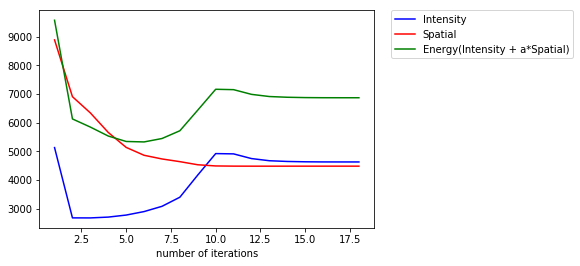

In [47]:
print(len(energy_intensity))
print(len(energy_spatial))
print(len(energy))


plotEnergy(energy_intensity, energy_spatial, energy)

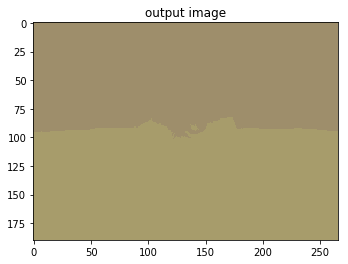

In [48]:
plotCentoidImages(average_image[2:],cluster_label)

<h2>n=3</h2>

In [128]:
k,cluster_label,average_image,distance_intensity,distance_spatial=generateCluster(3, count) #3 - cluster
print(k)
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,data,cluster_label)
pre_average_image=np.zeros((5,3), dtype=int)
energy_intensity=[]
energy_spatial=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(data,average_image,cluster_label,distance_intensity, distance_spatial)
    pre_average_image=average_image
    average_image=computeCentroid(k,data,cluster_label)
    energy_intensity.append(computeEnergy_intensity(distance_intensity))
    energy_spatial.append(computeEnergy_spatial(distance_spatial))
    num_iteration+=1


3


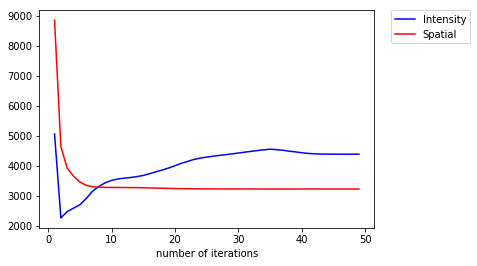

In [129]:
plotEnergy(energy_intensity, energy_spatial)

[[169.72234094 156.94577675 166.00873637]
 [158.49941408 140.41560414 154.97686609]
 [109.49920728 107.44115075 104.78746156]]
(50540,)


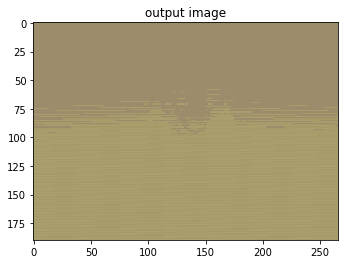

In [130]:
print(average_image[2:])
print(cluster_label.shape)
plotCentoidImages(average_image[2:],cluster_label)

<h2>n=4</h2>

In [131]:
k,cluster_label,average_image,distance_intensity,distance_spatial=generateCluster(4, count) #2 - cluster
print(k)
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,data,cluster_label)
pre_average_image=np.zeros((5,4), dtype=int)
energy_intensity=[]
energy_spatial=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(data,average_image,cluster_label,distance_intensity, distance_spatial)
    pre_average_image=average_image
    average_image=computeCentroid(k,data,cluster_label)
    energy_intensity.append(computeEnergy_intensity(distance_intensity))
    energy_spatial.append(computeEnergy_spatial(distance_spatial))
    num_iteration+=1
#     for i in range(k):
#         print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i],average_image[2][i],average_image[3][i],average_image[4][i])


4


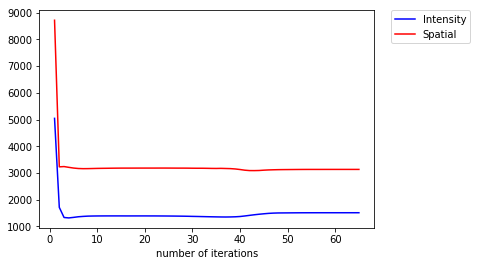

In [132]:
plotEnergy(energy_intensity, energy_spatial)

[[204.37372593 139.48029384 163.84787622 165.74531308]
 [198.08166604 118.6358352  152.71211783 154.35205632]
 [190.88121304  75.08329607 100.31964591 102.33449426]]
(50540,)


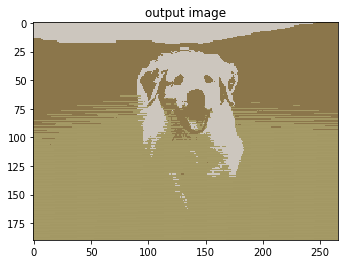

In [133]:
print(average_image[2:])
print(cluster_label.shape)
plotCentoidImages(average_image[2:],cluster_label)

<h2>n=5</h2>

In [134]:
k,cluster_label,average_image,distance_intensity,distance_spatial=generateCluster(5, count) #2 - cluster
print(k)
initializeLabel(k,cluster_label)
average_image=computeCentroid(k,data,cluster_label)
pre_average_image=np.zeros((5,5), dtype=int)
energy_intensity=[]
energy_spatial=[]
num_iteration=0
while not np.array_equal(pre_average_image,average_image):
    assignLabel(data,average_image,cluster_label,distance_intensity, distance_spatial)
    pre_average_image=average_image
    average_image=computeCentroid(k,data,cluster_label)
    energy_intensity.append(computeEnergy_intensity(distance_intensity))
    energy_spatial.append(computeEnergy_spatial(distance_spatial))
    num_iteration+=1
#     for i in range(k):
#         print(num_iteration ,"Centroid",i+1,":",average_image[0][i],average_image[1][i],average_image[2][i],average_image[3][i],average_image[4][i])


5


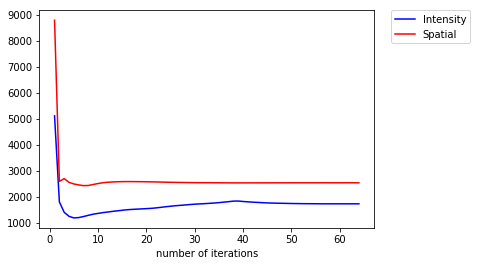

In [135]:
plotEnergy(energy_intensity, energy_spatial)

[[144.35257322 198.05754003 209.65050636 159.38641773 149.83547128]
 [124.70599943 193.99894422 199.5380306  149.01343418 130.65318832]
 [ 78.64230879 190.25831427 181.42921784  93.73020574  83.36121956]]
(50540,)


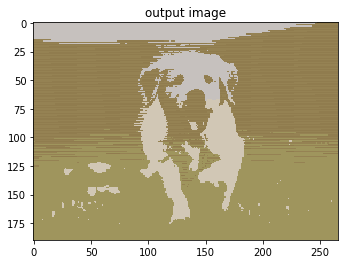

In [136]:
print(average_image[2:])
print(cluster_label.shape)
plotCentoidImages(average_image[2:],cluster_label)